In [8]:
from plantcv import plantcv as pcv
import cv2

In [2]:
# Printing a picture to screen at each step.
pcv.params.debug="plot"

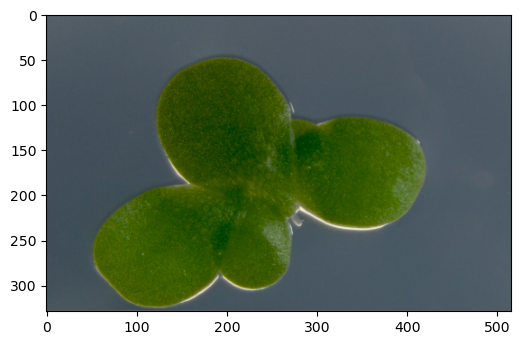

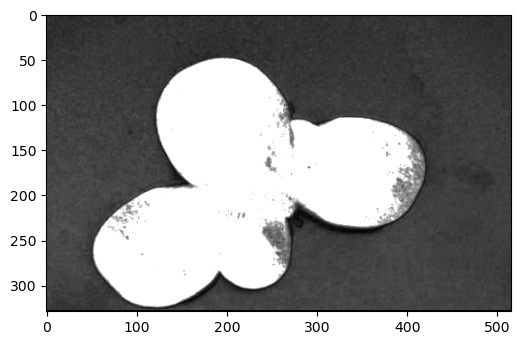

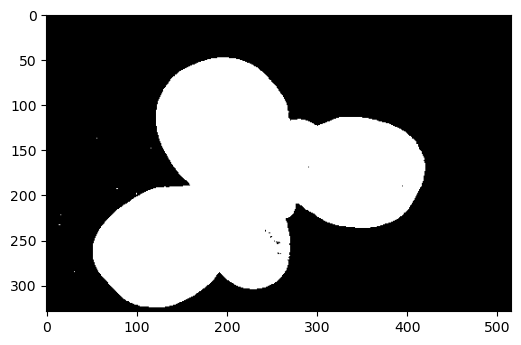

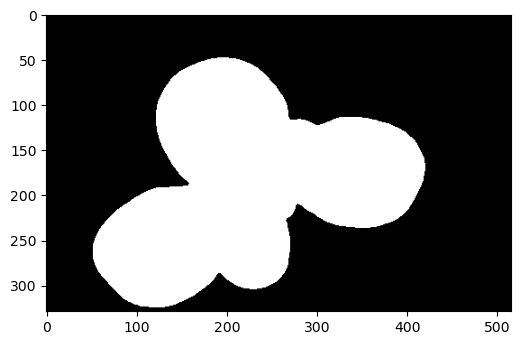

In [5]:
# Creating the "mask" using the VIS tutorial.
img, path, img_filename = pcv.readimage(filename="/users/jordanmanchengo/data/duckweed1.png")
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)

In [10]:
# Saving the mask as a file named "duck1mask.png". If output = "True" then image was saved.
cv2.imwrite("/users/jordanmanchengo/data/duck1mask.png", s_mblur)

True

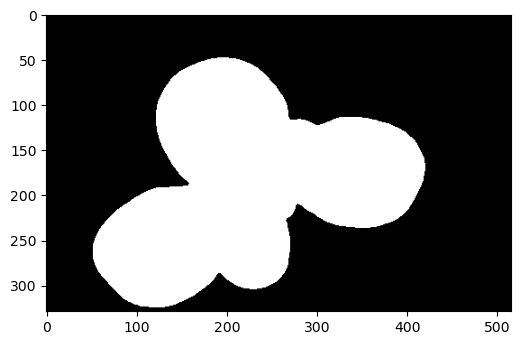

In [11]:
# Reading in the mask image.
mask, path, filename = pcv.readimage("/users/jordanmanchengo/data/duck1mask.png")

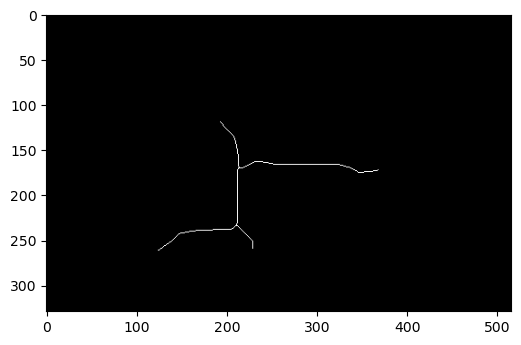

In [12]:
# Creating a "skeleton" (1 pixel wide representation) based off the mask.
# Imagine this skeleton growing and expanding as a GIF over the course of all 72 images.
skeleton = pcv.morphology.skeletonize(mask=mask)

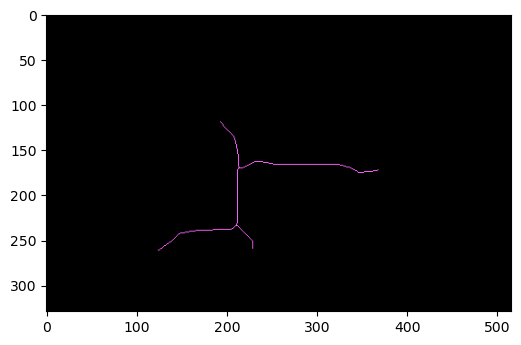

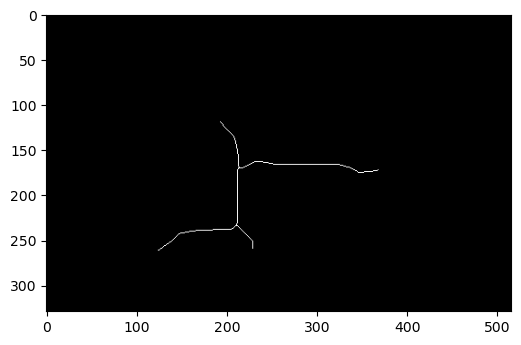

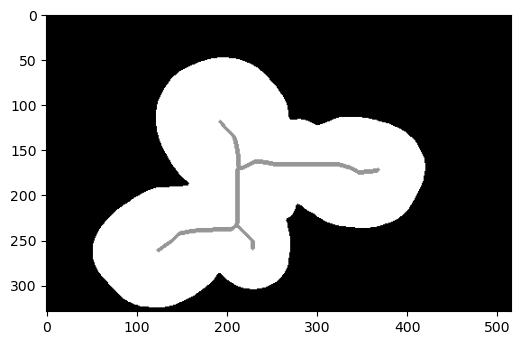

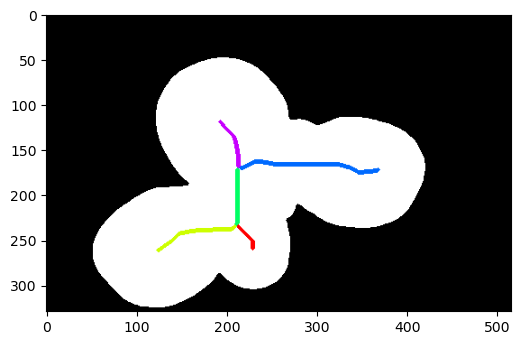

In [14]:
# Pruning any barbs (not an issue in the duckweed skeleton) and displaying the segments. 
pcv.params.line_thickness = 3
pruned, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=0, mask=mask)

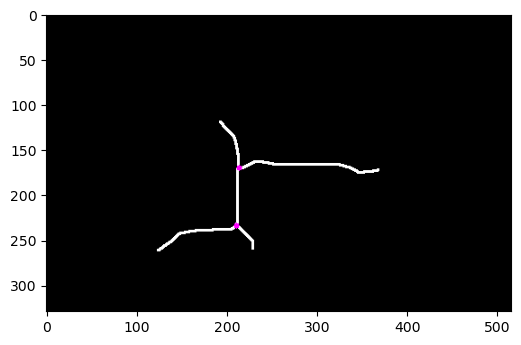

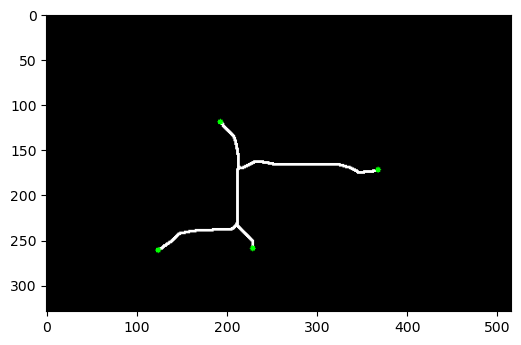

In [17]:
# All segment branch points shown as pink dots on skeleton.
# If you wanted to layer the mask under the skeleton like above, simply replace mask=None with mask=mask.
branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=skeleton, mask=None)
# All tip points shown as green dots on skeleton.
tip_pts_mask = pcv.morphology.find_tips(skel_img=skeleton, mask=None)

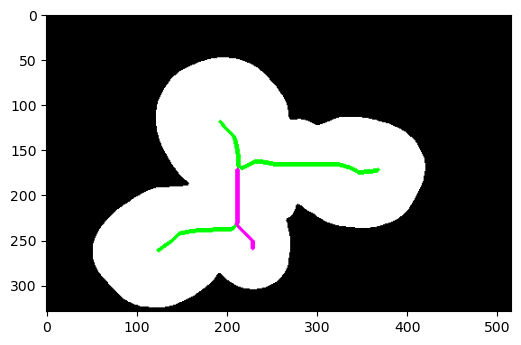

In [19]:
# Segment sorting is useful for identifying stem vs leaf but doesn't make much of a difference for duckweed.
duck_obj, weed_obj = pcv.morphology.segment_sort(skel_img=skeleton, objects=edge_objects, mask=mask)

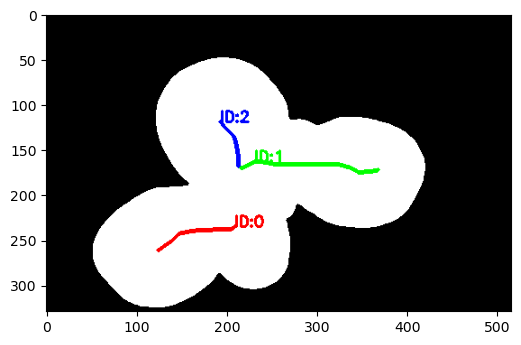

In [20]:
# PlantCV is able to ID each segment which would be great for large images of duckweed. However, it only picks up mature buds and not new buds.
segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton, objects=duck_obj, mask=mask)

#The rest of the workflow pertains to leaf structure (useful for spider plants or corn etc) not useful for budding plants.